In [21]:
import pandas as pd
import numpy as np
import os
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

In [5]:
# Data extraction
playerdata = pd.read_sql_query("""SELECT * FROM player_data where tour_id='isl7';""", conn)
xgfullvars = pd.read_sql_query("""SELECT * FROM XG where tour_id='isl7';""", conn)

In [6]:
#Data Extraction
pid=xgfullvars["a_player_id"].str.strip('P')
print(len(xgfullvars["a_player_id"]))
pid=pid.where(pd.notnull(pid)," ")
for i in range(1,len(pid)):
    if pid[i]==' ':
        pid[i]=pid.drop(pid.index[i])
    else:
        pid[i]=float(pid[i])
pid=pid.drop_duplicates()
pid

2286


0                                                     476
1                                                  3424.0
2                                                   157.0
3                                                   427.0
4                                                  3370.0
                              ...                        
2245    0          476
1       3424.0
2        157.0
3...
2257    0          476
1       3424.0
2        157.0
3...
2265    0          476
1       3424.0
2        157.0
3...
2269    0          476
1       3424.0
2        157.0
3...
2277    0          476
1       3424.0
2        157.0
3...
Name: a_player_id, Length: 512, dtype: object

In [10]:
#Calculating top chance creators
pid=xgfullvars["a_player_id"]
df=xgfullvars[["a_player_id", "a_player_name"]]
df["chances_created"]=0
for i in pid:
    cursor.execute("SELECT * FROM XG where tour_id='isl7' and a_player_id = %s;", (i,))
    a_data = cursor.fetchall()
    a_data = pd.DataFrame(list(a_data), columns=xgfullvars.columns)
    df["chances_created"]=np.where((df["a_player_id"]==i) ,len(a_data),df["chances_created"])

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [20]:
df=df[df["a_player_id"]!=" "]
df=df.reset_index(drop=True)
df[["a_player_name","chances_created"]]

,a_player_name,chances_created
0,Sahal Abdul Samad,24
1,Bakary Kone,1
2,Edu Garcia,12
3,Pronay Halder,11
4,Javier Hernandez,13
...,...,...
2004,Manvir Singh,19
2005,Bipin Singh,25
2006,Bartholomew Ogbeche,11
2007,Marcelo Pereira,9


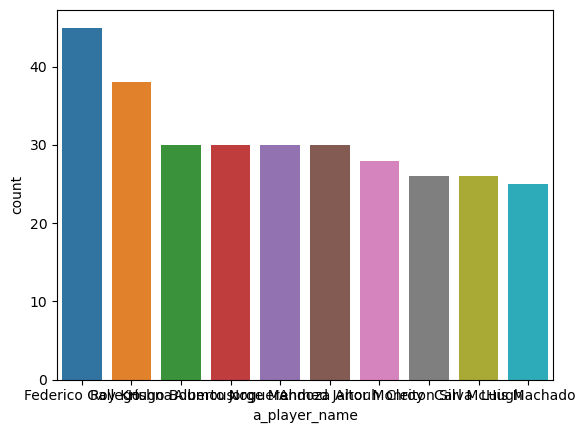

In [12]:
#Plotting bar plot
fig,ax = plt.subplots()
sns.countplot(x="a_player_name", data=df, order=df["a_player_name"].value_counts().iloc[:10].index)
fig

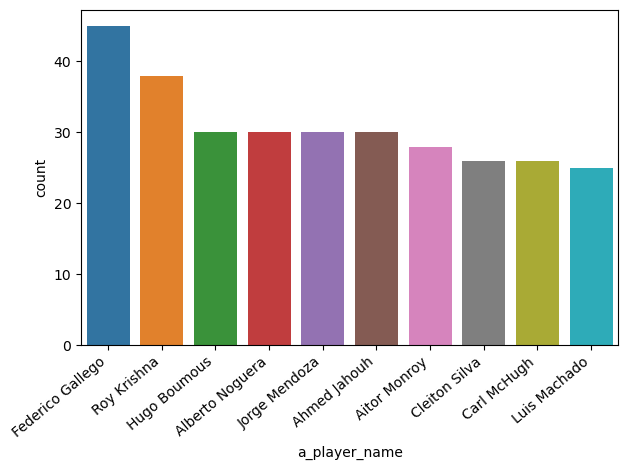

In [13]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

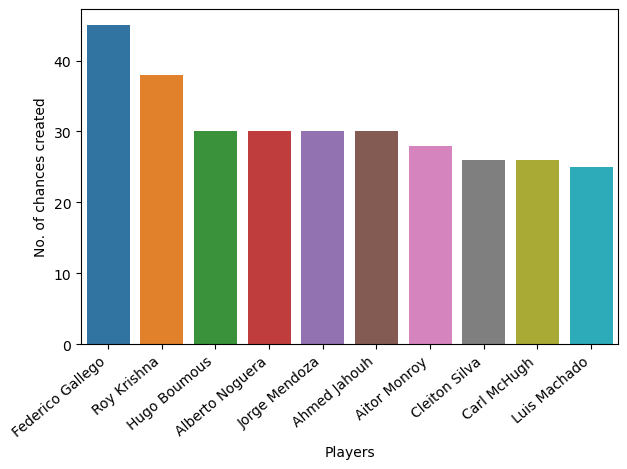

In [14]:
ax.set(xlabel='Players', ylabel='No. of chances created')
fig

In [15]:
federicodata = pd.read_sql_query("""SELECT * FROM XG where tour_id='isl7' and a_player_id = "567";""", conn)

In [16]:
federicodata["Outcome"] = 0
federicodata["Outcome"] = np.where((federicodata["Goal"] == 1) | (federicodata["Own_Goal"] == 1),"Goal", federicodata["Outcome"])
federicodata["Outcome"] = np.where((federicodata["Shot Type_On Target"] == 1) & (federicodata["Goal"] == 0) & (federicodata["Own_Goal"] == 0), "On Target",federicodata["Outcome"])
federicodata["Outcome"] = np.where(federicodata["Shot Type_Off Target"] == 1, "Off Target", federicodata["Outcome"])
federicodata["Outcome"] = np.where(federicodata["Shot Type_Blocked"] == 1, "Blocked", federicodata["Outcome"])
federicodata["Outcome"] = np.where(federicodata["Shot Type_Deflected"] == 1, "Deflected",federicodata["Outcome"])
federicodata["Outcome"] 

0        Blocked
1     Off Target
2        Blocked
3     Off Target
4        Blocked
5        Blocked
6        Blocked
7      On Target
8      On Target
9      On Target
10    Off Target
11    Off Target
12     On Target
13    Off Target
14          Goal
15     On Target
16     On Target
17     Deflected
18          Goal
19    Off Target
20    Off Target
21          Goal
22     On Target
23          Goal
24    Off Target
25    Off Target
26    Off Target
27    Off Target
28       Blocked
29     On Target
30    Off Target
31     On Target
32    Off Target
33          Goal
34          Goal
35     On Target
36     On Target
37       Blocked
38    Off Target
39    Off Target
40    Off Target
41    Off Target
42       Blocked
43    Off Target
44     On Target
Name: Outcome, dtype: object

In [17]:
federicodata["ATransY"] = federicodata.apply(lambda x: 1 - x.Assist_FieldY if x.FieldX < 0.5 else x.Assist_FieldY, axis=1)
federicodata["ATransX"] = federicodata.apply(lambda x: 1 - x.Assist_FieldX if x.FieldX < 0.5 else x.Assist_FieldX, axis=1)

In [18]:
#scaling according to pitchmap
federicodata["ATransX"] = federicodata["ATransX"]*100
federicodata["ATransY"] = federicodata["ATransY"]*100

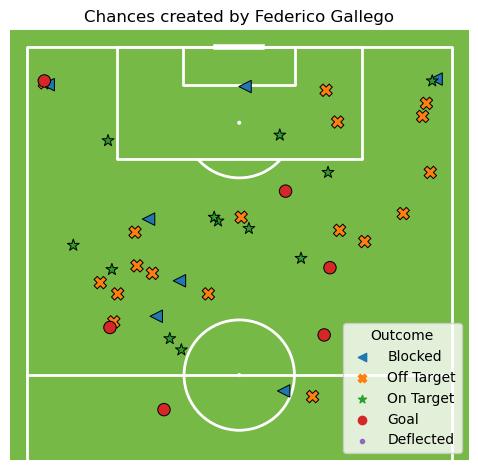

In [19]:
fig, ax = plt.subplots()
pitch= VerticalPitch(pitch_type='opta',pitch_color='#76b947',line_color='#ffffff', half=True, pad_bottom = 20)
fig, ax = pitch.draw()
markers={"Goal":"o","Off Target":"X","On Target":"*","Blocked":"<","Deflected":"."}
order=["Goal","On Target", "Off Target","Blocked","Deflected"]
ax = sns.scatterplot(x="ATransY", y="ATransX", data=federicodata, hue="Outcome",edgecolor="black",style="Outcome",s=80,markers=markers)
handles, labels = ax.get_legend_handles_labels()

plt.title("Chances created by Federico Gallego")
fig